In [1]:
# Обновленный код с учетом признаков корреляции
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Предположим, что ваш датафрейм называется data_merged и содержит все необходимые признаки
data_merged = pd.read_csv("all_vacancies_after_processing.csv")
data_merged['Average Salary'] /= 1000

# Оставляем только признаки корреляции
correlated_features = ['Average Salary', 'Experience', 'Population', 'Schedule Encoded']
data_filtered = data_merged[correlated_features]

# Разделение данных на обучающий и тестовый наборы
X = data_filtered.drop('Average Salary', axis=1)  # Матрица признаков
y = data_filtered['Average Salary']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение моделей
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Оценка моделей
models = {'Linear Regression': linear_reg,
          'Random Forest': random_forest,
          'Gradient Boosting': gradient_boosting}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    print()


Linear Regression:
  Mean Absolute Error: 27.90
  Mean Squared Error: 1434.14
  R^2 Score: 0.24

Random Forest:
  Mean Absolute Error: 25.04
  Mean Squared Error: 1209.27
  R^2 Score: 0.36

Gradient Boosting:
  Mean Absolute Error: 25.19
  Mean Squared Error: 1208.94
  R^2 Score: 0.36



Cross Validation for Linear Regression:
MAE: 27.700911527800894 MAPE: 0.3807468751773228 
MSE: 1406.1095514663969 R2: 0.24178496293357443


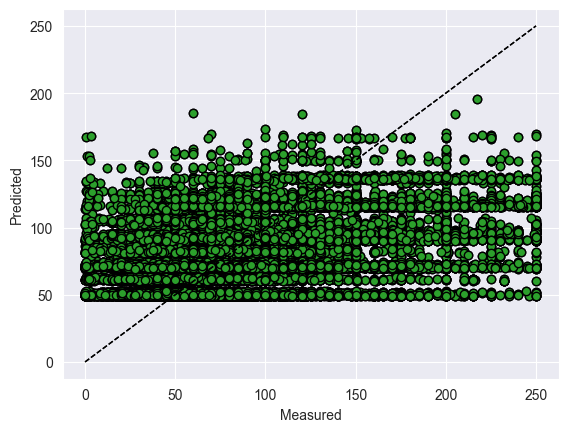

Cross Validation for Random Forest:
MAE: 24.959323205381637 MAPE: 0.34306395684677793 
MSE: 1195.1722204633545 R2: 0.35552848745367416


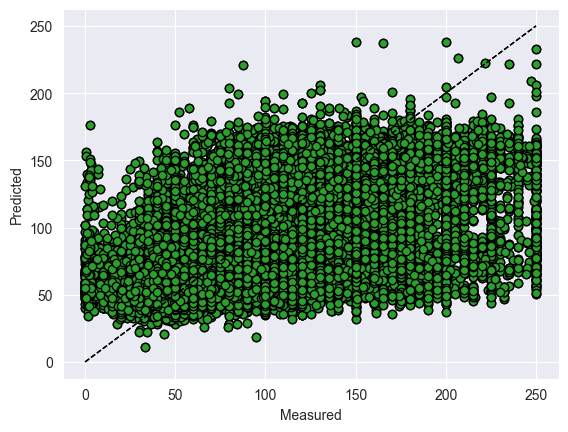

Cross Validation for Gradient Boosting:
MAE: 25.009742327540657 MAPE: 0.3437569637607188 
MSE: 1186.0706634831313 R2: 0.36043631085614336


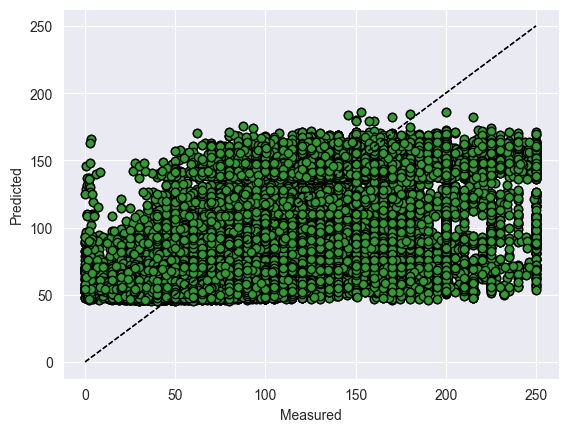

In [2]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict


def cross_val_fig(model, X, y, splits):
    """Визуализация прогноза кросс-валидации данных"""
    predicted = cross_val_predict(model, X, y, cv=splits)

    error = mean_absolute_error(y, predicted)
    mse = mean_squared_error(y, predicted)
    r2 = r2_score(y, predicted)
    fig, ax = plt.subplots()
    for color in ['tab:orange', 'tab:green']:
        ax.scatter(y, predicted, edgecolors=(0, 0, 0), c=color)
        ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')

    print('MAE:', error, 'MAPE:', error / y.mean(), '\nMSE:', mse, 'R2:', r2)
    plt.show()
# Вызов функции для каждой модели
for name, model in models.items():
    
    print(f"Cross Validation for {name}:")
    cross_val_fig(model, X_train, y_train, 5)